In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Bagging

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_fun import GetTitanicDataset

In [5]:
titanic = GetTitanicDataset()
X, y = titanic()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

In [7]:
num_attr = X_train.select_dtypes(include='number').columns
cat_attr = X_train.select_dtypes(exclude='number').columns

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer


num_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='median')),
     ('standard_scaller', StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    [
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False)),
    ]
)

cat_num_pipeline = ColumnTransformer(
    transformers=
    [
     ('numerical', num_pipeline, num_attr),
     ('categorical', cat_pipeline, cat_attr)
    ]
)

In [58]:
X_train_tr = cat_num_pipeline.fit_transform(X_train)
X_test_tr = cat_num_pipeline.transform(X_test)

## Random Forrest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,  # The number of trees in the forest.
    criterion='gini',  # The function to measure the quality of a split
    max_depth=None, # The maximum depth of the tree   
    oob_score=True,  
)

rf.fit(X_train_tr, y_train)

RandomForestClassifier(oob_score=True)

In [60]:
y_pred = rf.predict(X_test_tr)
y_train_pred = rf.predict(X_train_tr)

In [61]:
rf.oob_score_

0.7907303370786517

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       110
           1       0.76      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [63]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.98      0.97      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [64]:
from plot_utils import MetricsUtils

metrics = MetricsUtils(x_train=X_train_tr, x_test=X_test_tr, y_train=y_train, y_test=y_test, estimator=rf)

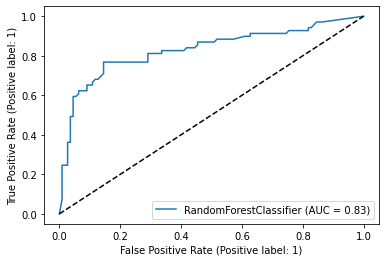

In [65]:
metrics.plot_roc_auc_curve()

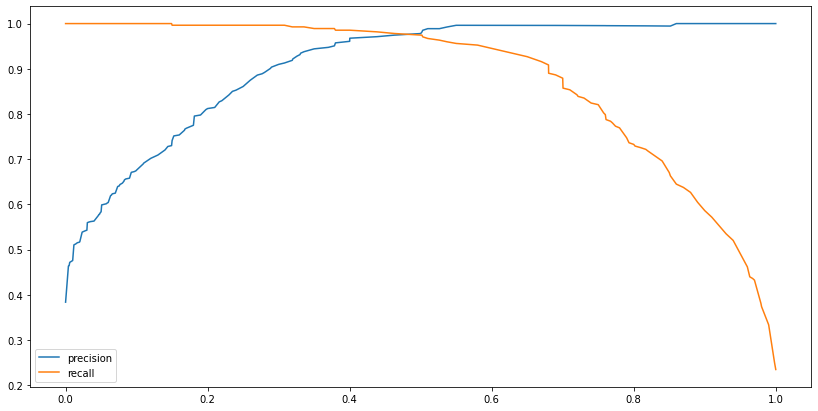

In [66]:
metrics.show_precision_recall()

# Boosting

## AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_tr, y_train)

AdaBoostClassifier()

In [68]:
y_train_pred = ada.predict(X_train_tr)
y_pred = ada.predict(X_test_tr)

In [69]:
print("TEST")
print(classification_report(y_test, y_pred))
print("\n\nTRAIN")
print(classification_report(y_train, y_train_pred))

TEST
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.70      0.71      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



TRAIN
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       439
           1       0.79      0.78      0.79       273

    accuracy                           0.84       712
   macro avg       0.83      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



## Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_tr, y_train)

GradientBoostingClassifier()

In [71]:
y_train_pred = gb.predict(X_train_tr)
y_pred = gb.predict(X_test_tr)

In [72]:
print("TEST")
print(classification_report(y_test, y_pred))
print("\n\nTRAIN")
print(classification_report(y_train, y_train_pred))

TEST
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.64      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



TRAIN
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       439
           1       0.93      0.81      0.87       273

    accuracy                           0.90       712
   macro avg       0.91      0.89      0.89       712
weighted avg       0.90      0.90      0.90       712

